In [1]:
#importing necessary libraries\
import pandas as pd
labels=pd.read_csv('sample_labels.csv')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('whitegrid')
%matplotlib inline
from tqdm import tqdm 
import cv2
import os 
import random 
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np



In [2]:
labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [3]:
#Adding a column path to the dataset which stores path of the images

PATH=os.path.abspath(os.path.join('sample\images'))
images = glob(os.path.join(PATH, "*.png"))    
labels['path']=images
labels.head()


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,C:\Users\91963\Desktop\archive\sample\images\0...
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168,C:\Users\91963\Desktop\archive\sample\images\0...
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,C:\Users\91963\Desktop\archive\sample\images\0...
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143,C:\Users\91963\Desktop\archive\sample\images\0...
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168,C:\Users\91963\Desktop\archive\sample\images\0...


In [4]:
#Checking for null values
print(labels.isnull().sum().sum())
labels.describe()

0


,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
count,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000
mean,8.616661,14330.617017,2644.795755,2491.087406,0.155467,0.155467
std,15.565815,8411.477789,347.188754,399.119063,0.016201,0.016201
min,0.000000,13.000000,1362.000000,966.000000,0.115000,0.115000
25%,0.000000,7289.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,2542.000000,2544.000000,0.143000,0.143000
75%,10.000000,20655.500000,2992.000000,2991.000000,0.168000,0.168000
max,177.000000,30797.000000,3266.000000,3056.000000,0.198800,0.198800


In [5]:
labels['Patient Age'] = labels['Patient Age'].map(lambda data: int(data[:-1]))


In [6]:
#Statistical Details
labels["Patient Age"].describe()

count    5606.000000
mean       46.770068
std        17.407436
min         1.000000
25%        35.000000
50%        49.000000
75%        59.000000
max       411.000000
Name: Patient Age, dtype: float64

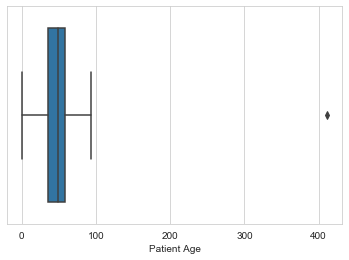

In [7]:
import seaborn as sns
sns.boxplot(labels['Patient Age'])

In [8]:
d1 = labels[labels['Patient Age']>100]
d1


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
4242,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,0.139,C:\Users\91963\Desktop\archive\sample\images\0...


In [9]:
labels=labels[labels['Patient Age']<100].dropna()
labels["Patient Age"].max()


94

In [10]:

labels.shape

(5605, 12)

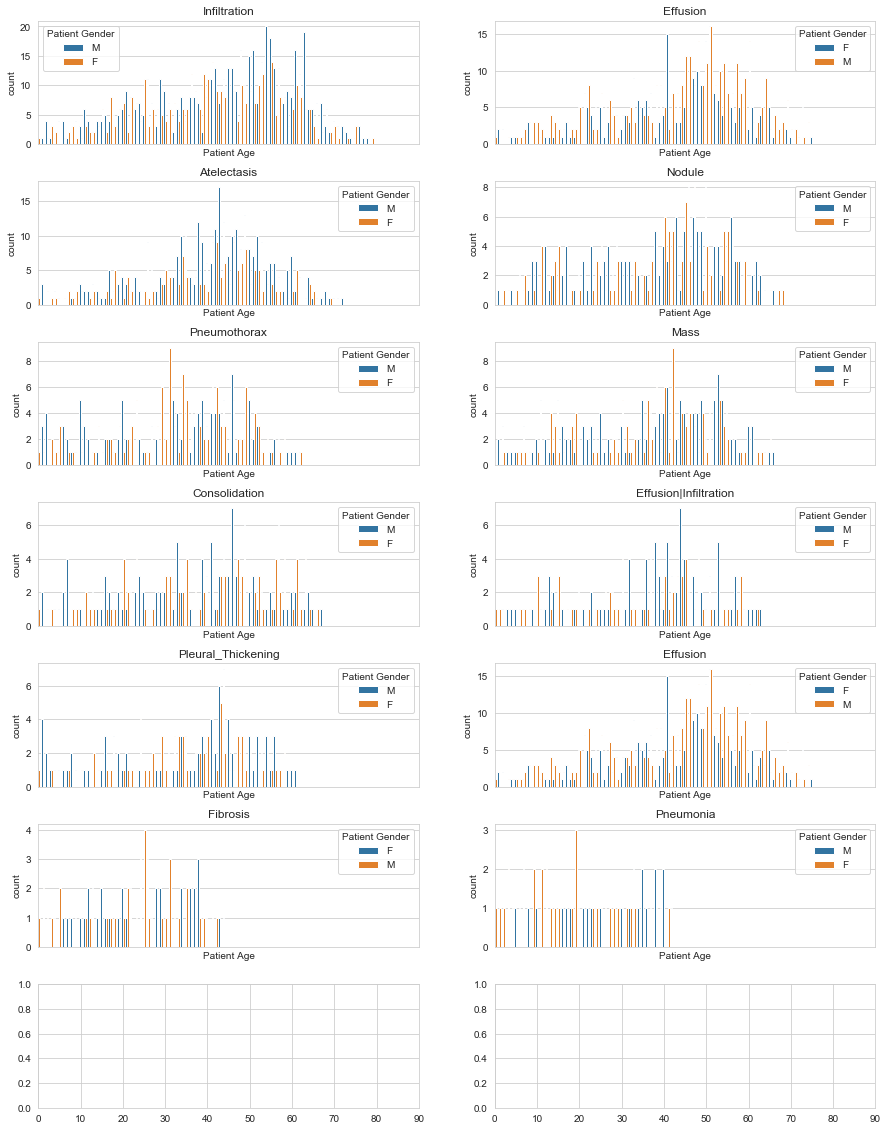

In [11]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))
pathology_list = ['Infiltration','Effusion','Atelectasis','Nodule','Pneumothorax','Mass','Consolidation','Effusion|Infiltration','Pleural_Thickening','Effusion','Fibrosis','Pneumonia']
df =labels[labels['Finding Labels'] != 'No Finding']
i=0
j=0
x=np.arange(0,100,10)
for pathology in pathology_list :
    index = []
    for k in range(len(df)):
        if pathology in df.iloc[k]['Finding Labels']:
            index.append(k)
    g=sns.countplot(x='Patient Age', hue="Patient Gender",data=df.iloc[index], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)
#Atelectasis-508 images, Pneumonia-62, Hernia-13 images, images, Edema-118 images, Emphysema-127 images, Cardiomegaly-141 images, Fibrosis-84 images, Pneumothorax-271 images, Consolidation-226 images, Pleural Thickening-176 images, Mass 284 images, Effusion - 644 images, Infiltration 967 images, Nodule-313 images, No Finding - 3044 images. 

In [27]:
for pathology in pathology_list :
    labels[pathology] = labels['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Consolidation,Effusion|Infiltration,Pleural_Thickening,Fibrosis,Pneumonia,Labels_Count,Cardiomegaly,Emphysema,Hernia,Edema
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,60,M,AP,3056,2544,0.139,...,0,0,1,0,0,4,0,1,0,0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,57,M,AP,2500,2048,0.168,...,0,0,0,0,0,2,1,1,0,0
2,00000017_001.png,No Finding,1,17,77,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000030_001.png,Atelectasis,1,30,79,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,55,F,AP,2500,2048,0.168,...,0,0,0,0,0,3,1,0,0,1


In [28]:
df=labels.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=df[['|' in index for index in df.index]].copy()
df2=df[['|' not in index for index in df.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values

In [14]:
print(df.head())

                Image Index  Follow-up #  Patient ID  Patient Age  \
Finding Labels                                                      
No Finding             3043         3043        3043         3043   
Infiltration            503          503         503          503   
Effusion                203          203         203          203   
Atelectasis             192          192         192          192   
Nodule                  144          144         144          144   

                Patient Gender  View Position  OriginalImageWidth  \
Finding Labels                                                      
No Finding                3043           3043                3043   
Infiltration               503            503                 503   
Effusion                   203            203                 203   
Atelectasis                192            192                 192   
Nodule                     144            144                 144   

                OriginalImageHei

In [15]:
print(df2.head())
print(df1.head())

                Image Index  Follow-up #  Patient ID  Patient Age  \
Finding Labels                                                      
Infiltration            503          503         503          503   
Effusion                203          203         203          203   
Atelectasis             192          192         192          192   
Nodule                  144          144         144          144   
Pneumothorax            114          114         114          114   

                Patient Gender  View Position  OriginalImageWidth  \
Finding Labels                                                      
Infiltration               503            503                 503   
Effusion                   203            203                 203   
Atelectasis                192            192                 192   
Nodule                     144            144                 144   
Pneumothorax               114            114                 114   

                OriginalImageHei

In [16]:
r = random.sample(images, 4)
plt.figure(figsize =(16,16))


<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

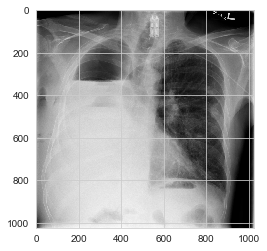

In [17]:
a=(cv2.imread(r[0]))
plt.imshow(a)


In [18]:
labels['Labels_Count'] = labels['Finding Labels'].apply(lambda text: len(text.split('|')) if(text != 'No Finding') else 0)

In [19]:
labels.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Atelectasis,Nodule,Pneumothorax,Mass,Consolidation,Effusion|Infiltration,Pleural_Thickening,Fibrosis,Pneumonia,Labels_Count
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,60,M,AP,3056,2544,0.139,...,0,0,1,0,0,0,1,0,0,4
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,57,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,2
2,00000017_001.png,No Finding,1,17,77,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000030_001.png,Atelectasis,1,30,79,M,PA,2992,2991,0.143,...,1,0,0,0,0,0,0,0,0,1
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,55,F,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,3


In [20]:
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
for pathology in pathology_list :
    labels[pathology] = labels['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

In [21]:

labels.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Consolidation,Effusion|Infiltration,Pleural_Thickening,Fibrosis,Pneumonia,Labels_Count,Cardiomegaly,Emphysema,Hernia,Edema
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,60,M,AP,3056,2544,0.139,...,0,0,1,0,0,4,0,1,0,0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,57,M,AP,2500,2048,0.168,...,0,0,0,0,0,2,1,1,0,0
2,00000017_001.png,No Finding,1,17,77,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000030_001.png,Atelectasis,1,30,79,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,55,F,AP,2500,2048,0.168,...,0,0,0,0,0,3,1,0,0,1


In [22]:
labels.shape

(5605, 28)

In [24]:
#tf.keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import  Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

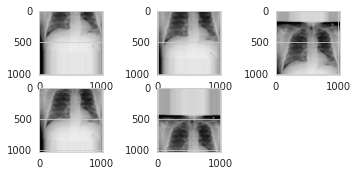

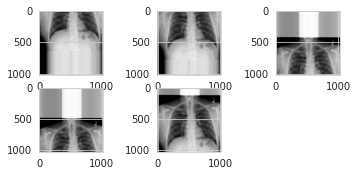

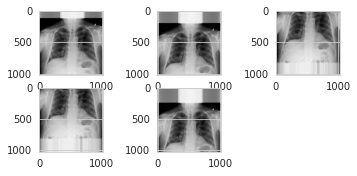

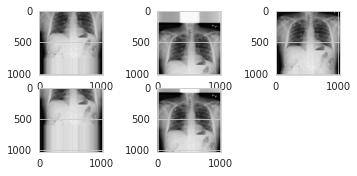

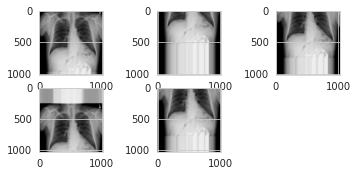

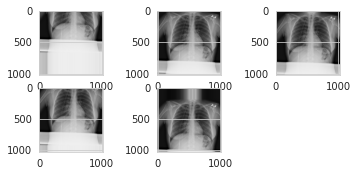

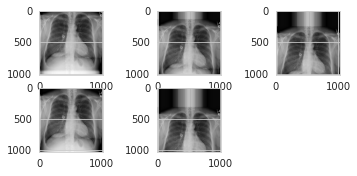

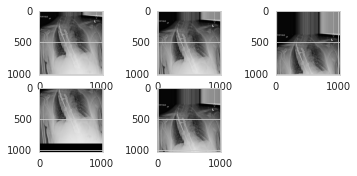

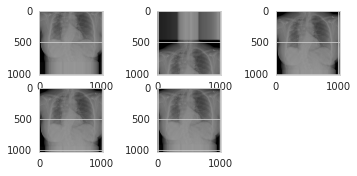

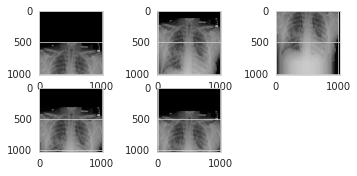

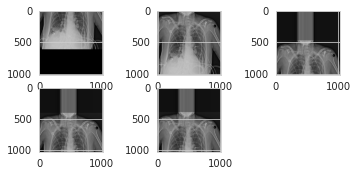

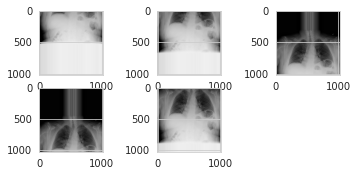

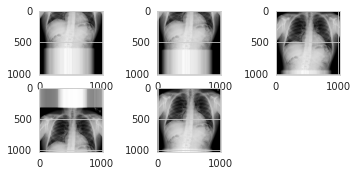

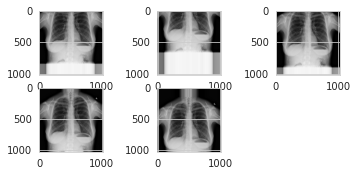

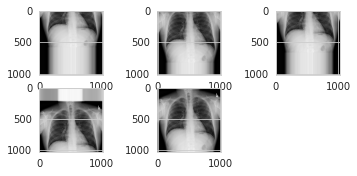

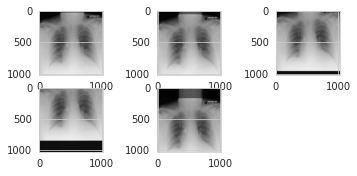

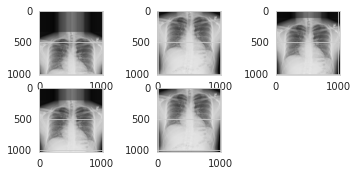

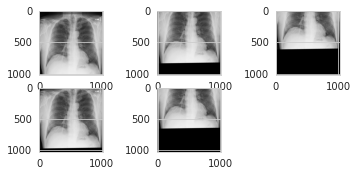

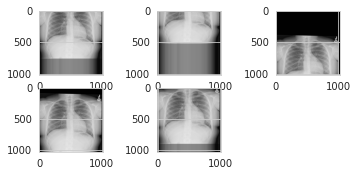

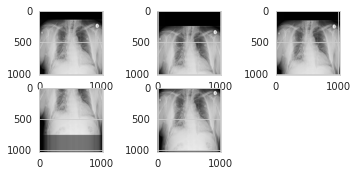

In [ ]:
vertical augmentation
#os.mkdir("Augimages")
for img in random.sample(os.listdir(PATH),20):  
  img = cv2.imread(os.path.join(PATH,img))
  #label['']
  data = np.asarray(img)
  samples = np.expand_dims(data, 0)
  datagen = ImageDataGenerator(height_shift_range=0.5)
  it = datagen.flow(samples, batch_size=1,save_to_dir='images', save_prefix='aug', save_format='png')
  for i in range(5):
      plt.subplot(330 + 1 + i)
      batch = it.next()
      image = batch[0].astype('uint8')
      plt.imshow(image)
  plt.show()
 

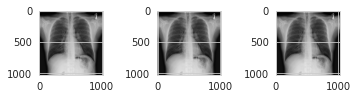

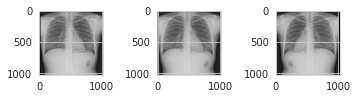

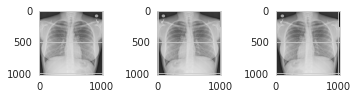

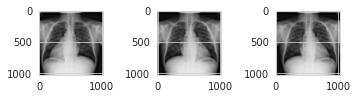

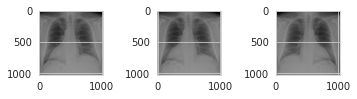

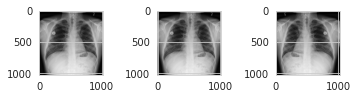

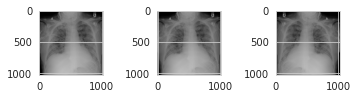

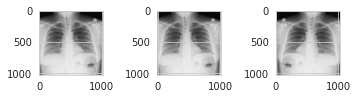

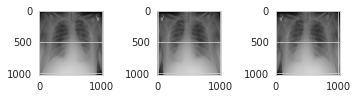

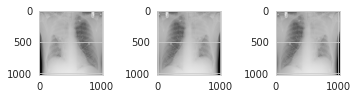

In [ ]:
flipping augmentation
for img in random.sample(os.listdir(PATH),10):  
  img = cv2.imread(os.path.join(PATH,img))
  data = np.asarray(img)
  samples = np.expand_dims(data, 0)
  # use parameter vertical_flip for vertical flip
  datagen = ImageDataGenerator(horizontal_flip=True)
  it = datagen.flow(samples, batch_size=1,save_to_dir='Augimagessave_prefix='aug_ver', save_format='png')
  for i in range(3):
      plt.subplot(330 + 1 + i)
      batch = it.next()
      image = batch[0].astype('uint8')
      plt.imshow(image)
  plt.show()

In [25]:
#this Code Is used to divide the whole dataset to infiltration and non-infiltration
def data_prep(find,full_size_image,a,b,counter):
    for i in range(counter):
        b.append(find)
        a.append(cv2.resize(full_size_image, (400,400), interpolation=cv2.INTER_CUBIC))
def proc_images():

    #arrays to hold feature vectors(samples) and class labels 
    a = []       #samples(images) as arrays
    b = [] 	     #disease numbering
    flag=0
    WIDTH = 400
    HEIGHT = 400
    
    #for img in images:
    for img in tqdm(labels["path"]):
        finding_list=[]
        if img != 'C:\\Users\\91963\\Desktop\\archive\\sample\\images\\00020900_002.png':
            base = os.path.basename(img)
            finding_list = (labels["Finding Labels"][labels["Image Index"] == base].values[0]).split('|')
            for finding in finding_list:
              full_size_image = cv2.imread(img,cv2.IMREAD_GRAYSCALE)

            
              if 'Infiltration' in finding:
                  find = 1
                  data_prep(find,full_size_image,a,b,2)
                  #b.append(find)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
              elif 'Cardiomegaly' in finding:
                  find = 2
                  data_prep(find,full_size_image,a,b,10)
                  #b.append(find)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
              elif 'Emphysema' in finding:
                  find = 3
                  data_prep(find,full_size_image,a,b,10)
                  #b.append(find)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

              elif 'Effusion' in finding:
                  find = 4
                  data_prep(find,full_size_image,a,b,3)
                  #b.append(find)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
              elif 'Hernia' in finding:
                  find = 5
                  data_prep(find,full_size_image,a,b,10)
                  #b.append(find)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
                  

              elif 'Nodule' in finding:
                  find = 6
                  data_prep(find,full_size_image,a,b,5)
                  #b.append(finding)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))


              elif 'Pneumothorax' in finding:
                  find = 7
                  data_prep(find,full_size_image,a,b,5)
                  #b.append(finding)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))


              elif 'Atelectasis' in finding:
                  find = 8
                  data_prep(find,full_size_image,a,b,3)
                  #b.append(finding)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))


              elif 'Pleural_Thickening' in finding:
                  find = 9
                  data_prep(find,full_size_image,a,b,5)
                  #b.append(finding)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))


              elif 'Mass' in finding:
                  find = 10
                  data_prep(find,full_size_image,a,b,5)
                  #b.append(finding)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))


              elif 'Edema' in finding:
                  find = 11
                  data_prep(find,full_size_image,a,b,10)
                  #b.append(finding)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

              if 'Fibrosis' in finding:
                  find = 12
                  data_prep(find,full_size_image,a,b,10)
                  #b.append(finding)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))


              elif 'Pneumonia' in finding:
                  find = 13
                  data_prep(find,full_size_image,a,b,10)
                  #b.append(finding)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

              elif 'Consolidation' in finding:
                  find=14
                  data_prep(find,full_size_image,a,b,5)
                  #b.append(finding)
                  #a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))


            
              elif 'No Finding'in finding:
                  flag+=1
                  find=0
                  if flag<1800:
                    b.append(find)
                    a.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
        #Read and Resize images 
            

    return a,b

In [26]:
a,b=proc_images()

100%|██████████████████████████████████████████████████████████████████████████████| 5605/5605 [04:16<00:00, 21.88it/s]


In [27]:
df = pd.DataFrame()
df["labels"] = b
df["images"] = a 
print(len(df), df.images[0].shape)           #print length of image index and dimensions of dataframe #df.shape #len(df)
print(df["labels"].value_counts())
print(df.head(50))


18989 (400, 400)
1     1934
4     1932
0     1799
6     1565
8     1524
10    1420
2     1410
7     1355
3     1270
11    1180
14    1130
9      880
12     840
13     620
5      130
Name: labels, dtype: int64
    labels                                             images
0        3  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
1        3  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
2        3  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
3        3  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
4        3  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
5        3  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
6        3  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
7        3  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
8        3  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
9        3  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
10       1  [[84, 85, 83, 83, 83, 82, 82, 82, 81, 80, 80, ...
11       1  [[84, 85, 83, 83, 83, 82, 82, 82, 8

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(a,b, test_size=0.3, random_state=240)
X_train= np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train= np.asarray(Y_train)
Y_test=np.asarray(Y_test)

In [29]:
X_train.shape

(13292, 400, 400)

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import  Model

In [31]:
X_train=X_train.reshape(len(X_train),400,400,1)
X_test=X_test.reshape(len(X_test),400,400,1)

In [32]:

K= len(set(Y_train))
print("number of classes:",K)

i = Input(shape=X_train[0].shape)
z = Conv2D(32, (3,3), strides=2, activation='relu')(i)
z = Conv2D(64, (3,3), strides=2, activation='relu')(z)
z = Conv2D(128, (3,3), strides=2, activation='relu')(z)
z = Conv2D(256, (3,3), strides=2, activation='relu')(z)
z = Conv2D(512, (3,3), strides=2, activation='relu')(z)
z = Flatten()(z)
z = Dropout(0.3)(z)
# Dense layers NN design commences here
z = Dense(256, activation='relu')(z)
z = Dropout(0.3)(z)
z = Dense(64, activation='relu')(z)
z = Dropout(0.3)(z)
z = Dense(K, activation='softmax')(z)

number of classes: 15


In [33]:
X_train.shape

(13292, 400, 400, 1)

In [34]:
X_test.shape

(5697, 400, 400, 1)

In [35]:
model = Model(i,z)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=32)



tf.keras.models.save_model(model,'model_cnn.h5')

Epoch 1/32
416/416 [==============================] - 483s 1s/step - loss: 2.7902 - accuracy: 0.0988 - val_loss: 2.5780 - val_accuracy: 0.1297
Epoch 2/32
416/416 [==============================] - 476s 1s/step - loss: 2.5226 - accuracy: 0.1449 - val_loss: 2.3152 - val_accuracy: 0.2273
Epoch 3/32
416/416 [==============================] - 480s 1s/step - loss: 2.2328 - accuracy: 0.2580 - val_loss: 1.9707 - val_accuracy: 0.3642
Epoch 4/32
416/416 [==============================] - 482s 1s/step - loss: 1.8317 - accuracy: 0.4008 - val_loss: 1.5207 - val_accuracy: 0.4985
Epoch 5/32
416/416 [==============================] - 500s 1s/step - loss: 1.4993 - accuracy: 0.5079 - val_loss: 1.3155 - val_accuracy: 0.5621
Epoch 6/32
416/416 [==============================] - 488s 1s/step - loss: 1.2751 - accuracy: 0.5785 - val_loss: 1.1640 - val_accuracy: 0.6022
Epoch 7/32
416/416 [==============================] - 486s 1s/step - loss: 1.1178 - accuracy: 0.6254 - val_loss: 1.0729 - val_accuracy: 0.6302

tf.keras.models.save_model(model,'/content/gdrive/MyDrive/sample/model_cnn.h5')
train_loss,train_acc=model.evaluate(x=X_train, y=Y_train)
test_loss,test_acc=model.evaluate(x=X_test, y=Y_test)
print('Train: %.3f,Test: %.3f'%(train_acc,test_acc))   


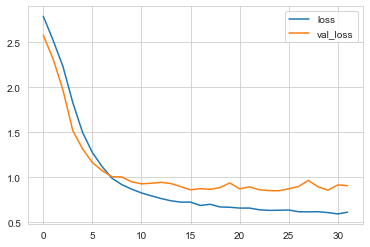

In [36]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

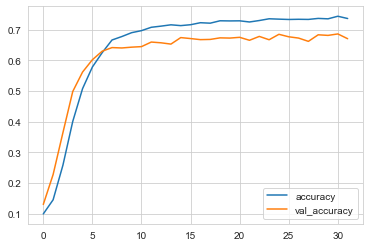

In [37]:

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [38]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)


Epoch 1/10
416/416 [==============================] - 449s 1s/step - loss: 0.5951 - accuracy: 0.7365 - val_loss: 0.8645 - val_accuracy: 0.6921
Epoch 2/10
416/416 [==============================] - 452s 1s/step - loss: 0.6025 - accuracy: 0.7328 - val_loss: 0.8398 - val_accuracy: 0.6898
Epoch 3/10
416/416 [==============================] - 455s 1s/step - loss: 0.5927 - accuracy: 0.7432 - val_loss: 0.8584 - val_accuracy: 0.6902
Epoch 4/10
416/416 [==============================] - 464s 1s/step - loss: 0.5847 - accuracy: 0.7459 - val_loss: 0.8602 - val_accuracy: 0.6839
Epoch 5/10
416/416 [==============================] - 456s 1s/step - loss: 0.5928 - accuracy: 0.7384 - val_loss: 0.8375 - val_accuracy: 0.6911
Epoch 6/10
416/416 [==============================] - 460s 1s/step - loss: 0.5863 - accuracy: 0.7404 - val_loss: 0.8453 - val_accuracy: 0.6856
Epoch 7/10
416/416 [==============================] - 466s 1s/step - loss: 0.5776 - accuracy: 0.7436 - val_loss: 0.9536 - val_accuracy: 0.6842

In [ ]:
#W$tf.keras.models.save_model(new_model,'/content/gdrive/MyDrive/sample/model_cnn_updated.h5')

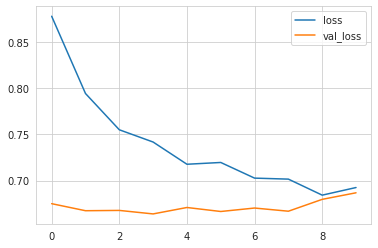

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

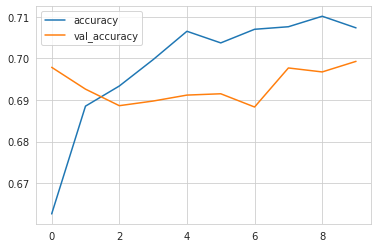

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
manual_test=df['images'][1471]
manual_test= np.asarray(manual_test)
manual_test=manual_test.reshape(1,400,400,1)
pred=model.predict(x=manual_test)
print(pred)
print("Predicted label",pred.argmax())
print(df["labels"][1471]) 

[[1.4105320e-05 1.1073553e-01 1.0095607e-05 1.7420222e-03 2.8708368e-04
  2.9496256e-08 5.7249975e-01 3.7155021e-03 5.8747095e-04 5.4542877e-05
  2.9204449e-01 1.5235321e-05 1.2965928e-04 2.0628581e-04 1.7958285e-02]]
Predicted label 6
6


Confusion matrix, without normalization
[[466  19   0   0   3   0   8   3   8   3   1   0   0   0   1]
 [  6 517  19  24  12   3  43  22 108  25  30  41   7  20  26]
 [  0   0 350   6   0   0   0   0   0   0  10  21  11   5   2]
 [  0   0   7 362   0   0   5   3   3   0   0   0   6  10   2]
 [  0  67  41  22 183   1  14  33  86  15  35  12  15   7  24]
 [  0   0   0   0   0  32   0   0   5   0   0   0   2   0   0]
 [  0  19   1   3   7   0 294  24  20  19  29   5  10  12   8]
 [  0   8   0  47  12   2   9 261  18   5  28   1   3   2   5]
 [  3  18  17  24   6   6   0  22 539  14   8  16  21  16  29]
 [  0   0   4  11   5   0   4   9   9 182  19   0  16   0  14]
 [  0   0   6  31   0   1  31  19  16  16 295  10   9   2   9]
 [  0   0   8   0   0   0   6   0   4   0   0 312   0  27   0]
 [  0   0   3   5   0   0   0   0   0   0   3   4 214   0   0]
 [  0   0   6   0   0   0   0   0   0   6   5  15   0 184   0]
 [  0   0  21   5   0   0   5   5  51   5  34   9   6  18 206]]


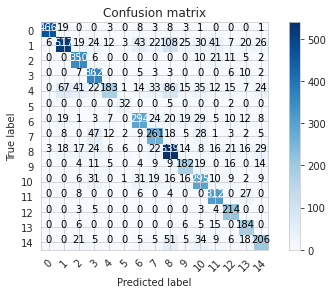

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = new_model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(15)))



In [ ]:
labels='''No Finding	
Infiltration 
Cardiomegaly
Emphysema
Effusion
Hernia
Nodule
Pneumothorax
Atelectasis
Pleural_Thickening
Mass
Edema
Fibrosis
Pneumonia
Consolidation
'''.split('\n')
labels

['No Finding\t',
 'Infiltration ',
 'Cardiomegaly',
 'Emphysema',
 'Effusion',
 'Hernia',
 'Nodule',
 'Pneumothorax',
 'Atelectasis',
 'Pleural_Thickening',
 'Mass',
 'Edema',
 'Fibrosis',
 'Pneumonia',
 'Consolidation',
 '']

Text(0.5, 1.0, 'True label: Effusion Predicted: Infiltration  ')

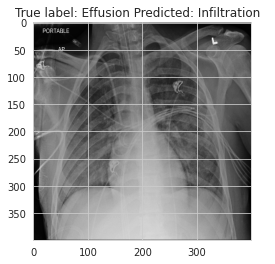

In [ ]:
misclassified_img = np.where(p_test!= Y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(X_test[i].reshape(400,400), cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[Y_test[i]],labels[p_test[i]]))